# **Prática 1 - Oscilações e Sistemas Ressonantes**

### **1. Frequência de Ressonância**

- Plotando o gráfico da amplitude pela frequência do sistema

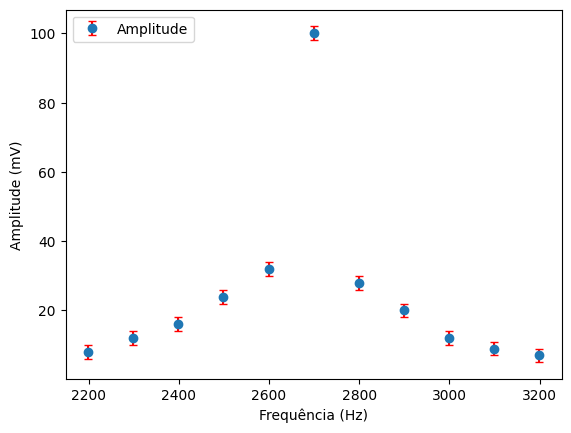

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carrega o arquivo CSV
data = pd.read_csv("Exp_D_Prática_1 - Parte1_Sem_Vela.csv")

# Converte as colunas 'frequencia' e 'amplitude' para float, substituindo a vírgula por ponto se necessário
#data['Frequencia Natural (Hz)'] = data['Frequencia Natural (Hz)'].str.astype(float)
#data['Amplitude (mV)'] = data['Amplitude (mV)'].str.astype(float)

# Calcula as barras de erro como 5% do valor da amplitude
#erro_amplitude = 0.05 * data['Amplitude (mV)']
erro_amplitude = 2

# Cria o gráfico
plt.errorbar(data['Frequencia Natural (Hz)'], data['Amplitude (mV)'], yerr=erro_amplitude, fmt='o', ecolor='red', capsize=3, label="Amplitude")

# Adiciona rótulos e título ao gráfico
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude (mV)")
plt.legend(loc="upper left")

# Salva o gráfico como PNG
plt.savefig("Gráfico_0.png", dpi=300)

# Exibe o gráfico
plt.show()


### **2. Oscilação com o Primeiro Tipo de Vela (Maior Área)**

- Plotando a oscilação original

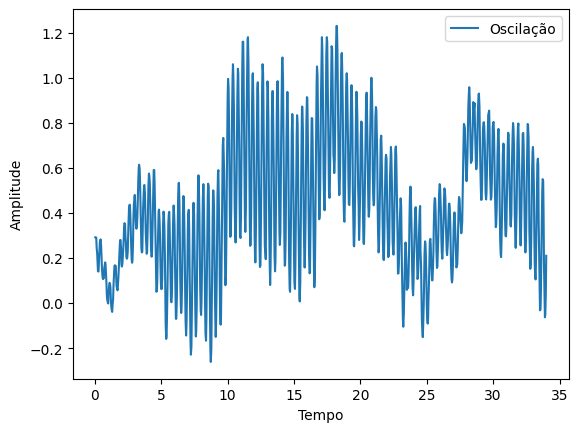

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carrega o arquivo CSV
data = pd.read_csv("Exp_D_Prática_1 - Parte1_Com_Vela_1.csv")

# Converte as colunas 't' e 'y' para floats, substituindo a vírgula por ponto
data['t'] = data['t'].str.replace(',', '.').astype(float)
data['y'] = data['y'].str.replace(',', '.').astype(float)

# Define as variáveis de tempo e amplitude
filtro = (data["t"] > 0) & (data["t"] < 40)
tempo = data['t'][filtro]
amplitude = data['y'][filtro]

# Plota os dados espelhados
plt.plot(tempo, amplitude, label="Oscilação")

plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

- Pegando apenas os pontos de máxima amplitude

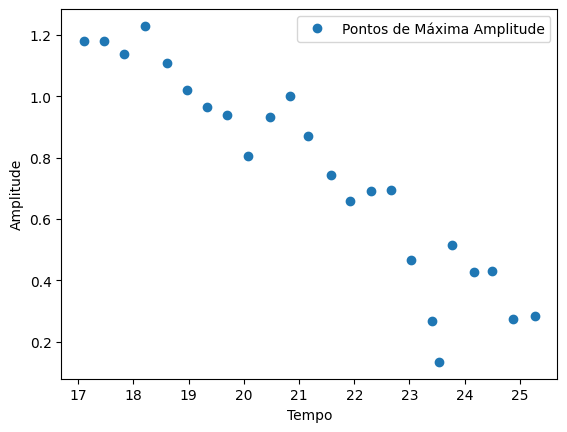

In [98]:
# Filtra os dados para tempos entre 16.8 e 25.6
filtro = (data['t'] > 16.8) & (data['t'] < 25.6)
tempo = data['t'][filtro].reset_index(drop=True)
amplitude = data['y'][filtro].reset_index(drop=True)

# Encontra os picos (máximos locais)
picos, _ = find_peaks(amplitude)
tempo_picos = tempo.iloc[picos]
amplitude_picos = amplitude.iloc[picos]

# Plota os dados 
plt.plot(tempo_picos, amplitude_picos, "o", label="Pontos de Máxima Amplitude")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

- Tirando os outliers 

Coeficiente de Amortecimento: 0.2286 ± 0.0307


C:\Users\lucas\AppData\Local\Temp\ipykernel_11048\2545620608.py:48: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-B * t)


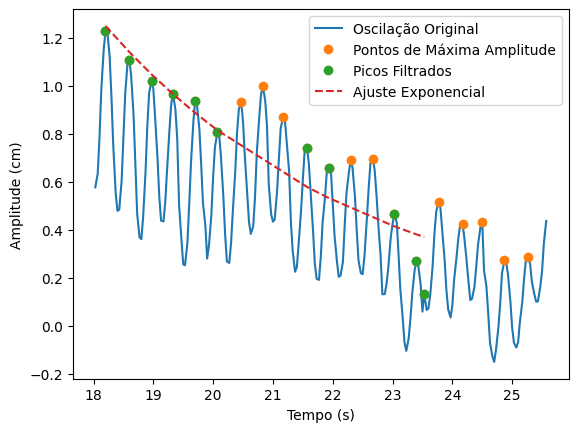

In [100]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Carrega o arquivo CSV
data = pd.read_csv("Exp_D_Prática_1 - Parte1_Com_Vela_1.csv")

# Converte as colunas 't' e 'y' para floats, substituindo a vírgula por ponto
data['t'] = data['t'].str.replace(',', '.').astype(float)
data['y'] = data['y'].str.replace(',', '.').astype(float)

# Filtra os dados para tempos entre o intervalo de tempo especificado
filtro = (data['t'] > 18) & (data['t'] < 25.6)
tempo = data['t'][filtro].reset_index(drop=True)
amplitude = data['y'][filtro].reset_index(drop=True)

# Encontra os picos (máximos locais)
picos, _ = find_peaks(amplitude)
tempo_picos = tempo.iloc[picos]
amplitude_picos = amplitude.iloc[picos]

# Converte para arrays numpy para compatibilidade com o ajuste
tempo_picos = np.array(tempo_picos)
amplitude_picos = np.array(amplitude_picos)

# Aplica o filtro para manter apenas picos decrescentes
tempo_picos_filtrados = [tempo_picos[0]]  # Primeiro valor do tempo_picos
amplitude_picos_filtrados = [amplitude_picos[0]]  # Primeiro valor do amplitude_picos

for i in range(1, len(amplitude_picos)):
    # Mantém o pico atual apenas se for menor que o anterior
    if amplitude_picos[i] < amplitude_picos_filtrados[-1]:
        tempo_picos_filtrados.append(tempo_picos[i])
        amplitude_picos_filtrados.append(amplitude_picos[i])

# Converte listas filtradas para arrays numpy
tempo_picos_filtrados = np.array(tempo_picos_filtrados)
amplitude_picos_filtrados = np.array(amplitude_picos_filtrados)

# Verifica se há pelo menos dois pontos para ajuste
if len(tempo_picos_filtrados) < 2:
    raise ValueError("Pontos insuficientes para realizar o ajuste exponencial. Verifique o filtro ou o intervalo de tempo.")

# Define a função exponencial para ajuste
def exponencial(t, A, B):
    return A * np.exp(-B * t)

# Ajusta a curva exponencial aos picos filtrados
parametros, covariancia = curve_fit(exponencial, tempo_picos_filtrados, amplitude_picos_filtrados)
A, coef_amortecimento = parametros

# Calcula o erro do coeficiente de amortecimento
erro_amortecimento = np.sqrt(covariancia[1, 1])

# Exibe o valor do coeficiente de amortecimento e seu erro estimado
print(f"Coeficiente de Amortecimento: {coef_amortecimento:.4f} ± {erro_amortecimento:.4f}")

# Plota os dados e o ajuste
plt.plot(tempo, amplitude, label="Oscilação Original")
plt.plot(tempo_picos, amplitude_picos, "o", label="Pontos de Máxima Amplitude")
plt.plot(tempo_picos_filtrados, amplitude_picos_filtrados, "o", label="Picos Filtrados")
plt.plot(tempo_picos_filtrados, exponencial(tempo_picos_filtrados, *parametros), label="Ajuste Exponencial", linestyle='--')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (cm)")
plt.legend()

# Salva o gráfico como PNG
#plt.savefig("Grafico_1.png", dpi=300)

plt.show()

### **3. Oscilação para o Segundo Tipo de Vela**

- Plotando a oscilação original.

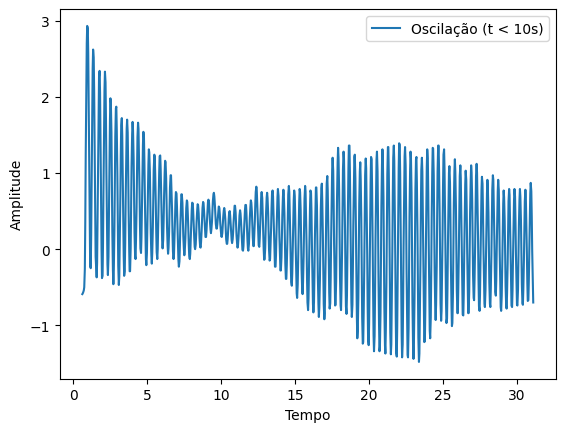

In [76]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Carrega o arquivo CSV
data = pd.read_csv("Exp_D_Prática_1 - Parte1_Com_Vela_2.csv")

# Converte as colunas 't' e 'y' para floats, substituindo a vírgula por ponto
data['t'] = data['t'].str.replace(',', '.').astype(float)
data['y'] = data['y'].str.replace(',', '.').astype(float)

# Filtra os dados para tempos menores que 40 segundos
filtro = (data['t'] > 0) & (data['t'] < 40)
tempo_filtrado = data['t'][filtro]
amplitude_filtrada = data['y'][filtro]

# Opcional: Plota os dados filtrados
plt.plot(tempo_filtrado, amplitude_filtrada, label="Oscilação (t < 10s)")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


- Selecionando os picos, filtrando os picos decrescentes e ajustando a curva exponencial.

Coeficiente de Amortecimento: 0.1933 ± 0.0076


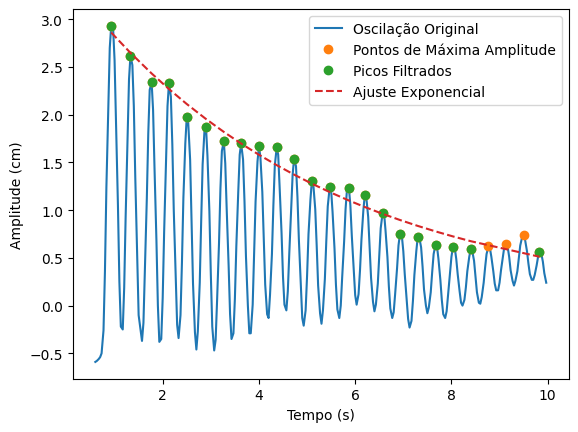

In [46]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Carrega o arquivo CSV
data = pd.read_csv("Exp_D_Prática_1 - Parte1_Com_Vela_2.csv")

# Converte as colunas 't' e 'y' para floats, substituindo a vírgula por ponto
data['t'] = data['t'].str.replace(',', '.').astype(float)
data['y'] = data['y'].str.replace(',', '.').astype(float)

# Filtra os dados para tempos entre 1 e 10 segundos
filtro = (data['t'] > 0) & (data['t'] < 10)
tempo = data['t'][filtro].reset_index(drop=True)
amplitude = data['y'][filtro].reset_index(drop=True)

# Encontra os picos (máximos locais)
picos, _ = find_peaks(amplitude)
tempo_picos = tempo.iloc[picos]
amplitude_picos = amplitude.iloc[picos]

# Converte para arrays numpy para compatibilidade com o ajuste
tempo_picos = np.array(tempo_picos)
amplitude_picos = np.array(amplitude_picos)

# Aplica o filtro para manter apenas picos decrescentes
tempo_picos_filtrados = [tempo_picos[0]]
amplitude_picos_filtrados = [amplitude_picos[0]]

for i in range(1, len(amplitude_picos)):
    if amplitude_picos[i] < amplitude_picos_filtrados[-1]:
        tempo_picos_filtrados.append(tempo_picos[i])
        amplitude_picos_filtrados.append(amplitude_picos[i])

# Converte listas filtradas para arrays numpy
tempo_picos_filtrados = np.array(tempo_picos_filtrados)
amplitude_picos_filtrados = np.array(amplitude_picos_filtrados)

# Define a função exponencial para ajuste
def exponencial(t, A, B):
    return A * np.exp(-B * t)

# Ajusta a curva exponencial aos picos filtrados com limites
parametros, covariancia = curve_fit(
    exponencial, 
    tempo_picos_filtrados, 
    amplitude_picos_filtrados, 
    p0=[1, 0.1],  # valores iniciais
    bounds=(0, [np.inf, 1])  # limite superior para evitar overflow
)
A, coef_amortecimento = parametros

# Calcula o erro do coeficiente de amortecimento
erro_amortecimento = np.sqrt(covariancia[1, 1])

# Exibe o valor do coeficiente de amortecimento e seu erro estimado
print(f"Coeficiente de Amortecimento: {coef_amortecimento:.4f} ± {erro_amortecimento:.4f}")

# Plota os dados e o ajuste
plt.plot(tempo, amplitude, label="Oscilação Original")
plt.plot(tempo_picos, amplitude_picos, "o", label="Pontos de Máxima Amplitude")
plt.plot(tempo_picos_filtrados, amplitude_picos_filtrados, "o", label="Picos Filtrados")
plt.plot(tempo_picos_filtrados, exponencial(tempo_picos_filtrados, *parametros), label="Ajuste Exponencial", linestyle='--')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude (cm)")
plt.legend()

# Salva o gráfico como PNG
# plt.savefig("Grafico_1.png", dpi=300)

plt.show()